För G:
1. Ladda ner ett eller flera dataset som visar GDP, GDP per capita och förväntad livslängd.
2. Visa hur förväntad livslängd och GDP per capita hänger ihop. Välj själv och motivera hur detta ska visualiseras.
3. Resonera kortfattat om resultaten verkar rimliga och fundera på om det finns någon orsak bakom ditt resultat.

Svara nu på dessa frågor:
4. Gjorde du någon Data Cleaning? Förklara vad du har gjort och motivera detta.
5. Vilka länder har förväntad livslängd en standardavvikelse över medelvärdet?
6. Vilka länder har hög förväntad livslängd men låg GDP/GDP per capita?
7. Har varje stor ekonomi (GDP) lång förväntad livslängd?
8. Om du ändrar definitionen av en stor ekonomi till GDP per capita. Hur förändras resultatet då? Diskutera kort resultatet i 7 och 8. 



In [3]:
import pandas as pd 

gdp_data = pd.read_csv("gdp.csv")
gdp_per_capita_data = pd.read_csv("gdp_per_capita.csv")
life_expectancy_data = pd.read_csv("Life-Expectancy-Data-Updated.csv")


C:\Users\Sergey\AppData\Local\Temp\ipykernel_10960\3894741307.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
df_gdp = gdp_data.drop(gdp_data.loc[:, '1960' : '2011'].columns, axis=1)
df_gdp = df_gdp.drop(df_gdp.loc[:, '2016' : 'Unnamed: 65'].columns, axis=1)

df_capita = gdp_per_capita_data.drop(gdp_per_capita_data.loc[:, '1960' : '2011'].columns, axis=1)
df_capita = df_capita.drop(df_capita.loc[:, '2016' : 'Unnamed: 65'].columns, axis=1)

df_capita = df_capita.drop(["Code"], axis = 1)

df_life = life_expectancy_data.drop(life_expectancy_data[life_expectancy_data.Year < 2012].index)

# df_life.drop(df_life.iloc[:, 3:20],axis= 1, inplace= True)
df_life = df_life.loc[:, ["Country","Year", "Life_expectancy", "GDP_per_capita"]]



df_gdp


,Country Name,Code,2012,2013,2014,2015
0,Aruba,ABW,2.534637e+09,2.727850e+09,2.790849e+09,2.962905e+09
1,Africa Eastern and Southern,AFE,9.505214e+11,9.642424e+11,9.848071e+11,9.199300e+11
2,Afghanistan,AFG,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10
3,Africa Western and Central,AFW,7.275714e+11,8.207876e+11,8.649666e+11,7.607297e+11
4,Angola,AGO,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11
...,...,...,...,...,...,...
261,Kosovo,XKX,6.163785e+09,6.735731e+09,7.074658e+09,6.295820e+09
262,"Yemen, Rep.",YEM,3.540134e+10,4.041524e+10,4.322859e+10,4.244510e+10
263,South Africa,ZAF,4.344005e+11,4.008860e+11,3.811989e+11,3.467098e+11
264,Zambia,ZMB,2.550306e+10,2.803724e+10,2.714102e+10,2.125122e+10


In [5]:

df_gdp = df_gdp.dropna(axis= 0, thresh = 6) 

df_capita = df_capita.dropna(axis = 0 , thresh = 6)



In [6]:
# joined = pd.concat([df_capita,df_life ], axis= 1)
# joined.groupby("Country Name")["Life_expectancy"].max().reset_index()


In [7]:
# df_life_sorted = df_life.groupby("Country")[["Life_expectancy","GDP_per_capita"]].mean()
# df_life_sorted.sort_values(["Life-Expectancy"], ascending = [False])


In [8]:
df_life.groupby("Country")["Life_expectancy"].mean().reset_index()
df_average_life = df_life.loc[:, "Life_expectancy"].mean()
df_average_gdp_capita = df_life.loc[:, "GDP_per_capita"].mean()
#df_average_gdp = df_gdp.loc[:, "GDP_per_capita"].mean()

df_average_gdp_capita


12308.27094972067

<Axes: xlabel='Year'>

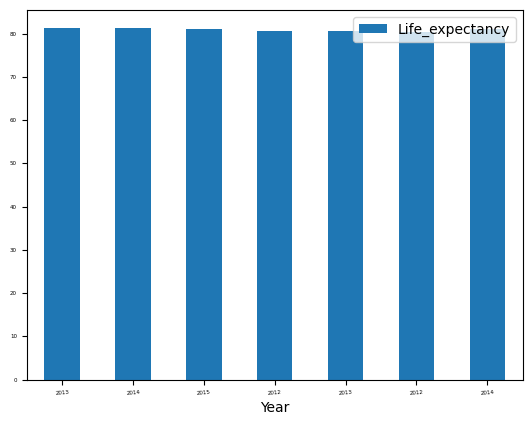

In [21]:
import matplotlib.pyplot as plt

df_filter = df_life[(df_life["Life_expectancy"] > 80) & (df_life["GDP_per_capita"]>=800) & (df_life["GDP_per_capita"]<19000)]
sort_df = df_filter.sort_values("GDP_per_capita", ascending= [True])


df_gdp = df_gdp.rename(columns={"Country Name": "Country"})
merg_df = sort_df.merge(df_gdp, on="Country", how="inner")
merg_df

merg_df.plot(y = ["Life_expectancy", "Country"], x = "Year", kind= "bar", rot= 5, fontsize = 4)

